## Box plots for ``natural diversity''¶

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 8 # that's default image size for this interactive session

import numpy as np
import pandas as pd

/Users/andrewbzikadze/anaconda/envs/python2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [1]:
from sample_reader.sample_reader import SampleReader

In [2]:
import sample_reader.standard_samples as standard_samples

In [6]:
import spots.spots as spots

hotspots, coldspots = spots.hotspots(), spots.coldspots()
hotspots_ind, coldspots_ind = spots.hotspots_indexes(), spots.coldspots_indexes()

In [7]:
from mutability_diversity.calculate_mutability_diversity import *
import kmer_utilities.kmer_utilities as kmer_utilities

In [8]:
def get_spot_colors(hotspot_color, coldspot_color):
    colors = np.array(['black'] * 1024)
    colors[spots.hotspots_indexes()] = hotspot_color
    colors[spots.coldspots_indexes()] = coldspot_color
    return colors

In [9]:
import kmer_utilities.filtering_kmers_utilities as filtering_kmers_utilities

In [10]:
def draw_diversity_graph(samples,
                         coverage_threshold=100,
                         mean_function=pd.DataFrame.median,
                         threshold_function=pd.Panel.min,
                         every_kth_kmer=1,
                         use_spots=True, hotspot_color='red', coldspot_color='blue',
                         diversity_function=calculate_mutability,
                         font_scale=1, output_pdf=None):
    if use_spots:
        colors = get_spot_colors(hotspot_color, coldspot_color)
    
    samples = samples.copy()
    ind_coverage, filtered_samples = \
        filtering_kmers_utilities.filter_by_coverage(samples, coverage_threshold=coverage_threshold,
                                                     mean_function=mean_function,
                                                     threshold_function=threshold_function)
    
    sorted_ind, mutability_diversity = \
        calculate_mutability_diversity(filtered_samples,
                                       diversity_function,
                                       ind_coverage)
    
    sorted_ind = sorted_ind[::every_kth_kmer]
    mutability_diversity = mutability_diversity.ix[:, ::every_kth_kmer]
    
    plt.rcParams['figure.figsize'] = 20, 8 # that's default image size for this interactive session
    g = sns.boxplot(mutability_diversity)
    
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    sns.set_context("poster")
    sns.set(font_scale=font_scale) 
    if use_spots:
        [t.set_color(i) for (i,t) in zip(colors[ind_coverage][sorted_ind], g.xaxis.get_ticklabels())]
        [t.set_facecolor(i) for (i,t) in zip(colors[ind_coverage][sorted_ind], g.artists)]
    
    if output_pdf is not None:
        #plt.rcParams['figure.figsize'] = 12, 8
        g.get_figure().savefig(output_pdf)

In [11]:
import sample_reader.standard_samples as sample_reader

/Users/andrewbzikadze/anaconda/envs/python2.7/lib/python2.7/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


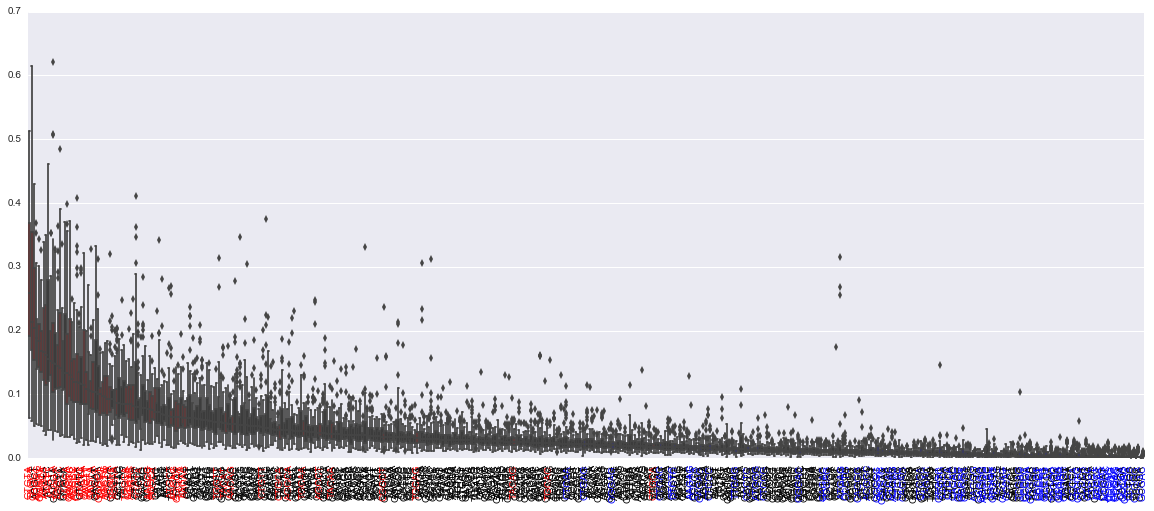

In [12]:
draw_diversity_graph(sample_reader.concatenate_kmer_freq_matrices_extended_base(),
                     coverage_threshold=3000, mean_function=pd.DataFrame.mean, threshold_function=pd.Panel.max,
                     diversity_function=calculate_mutability,
                     font_scale=2.05,
                     every_kth_kmer=1)
                     #output_pdf='/Users/andrewbzikadze/Yandex.Disk.localized/Documents/lab/lab_publications/immunogenomics/antevolo/figures/shm_model/mutability_diversity.pdf')

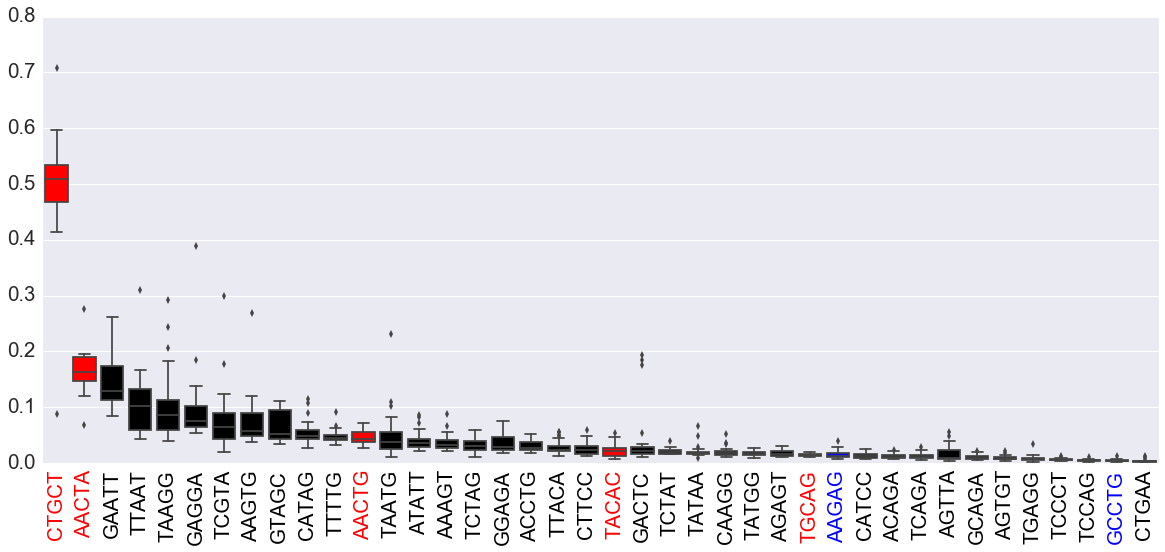

In [65]:
draw_diversity_graph(sample_reader.concatenate_kmer_freq_matrices(chain_type='IGK'),
                     coverage_threshold=3, mean_function=pd.DataFrame.median, threshold_function=pd.Panel.min,
                     diversity_function=calculate_mutability,
                     font_scale=2.05,
                     every_kth_kmer=11)
                     #output_pdf='/Users/andrewbzikadze/Yandex.Disk.localized/Documents/lab/lab_publications/immunogenomics/antevolo/figures/shm_model/mutability_diversity.pdf')

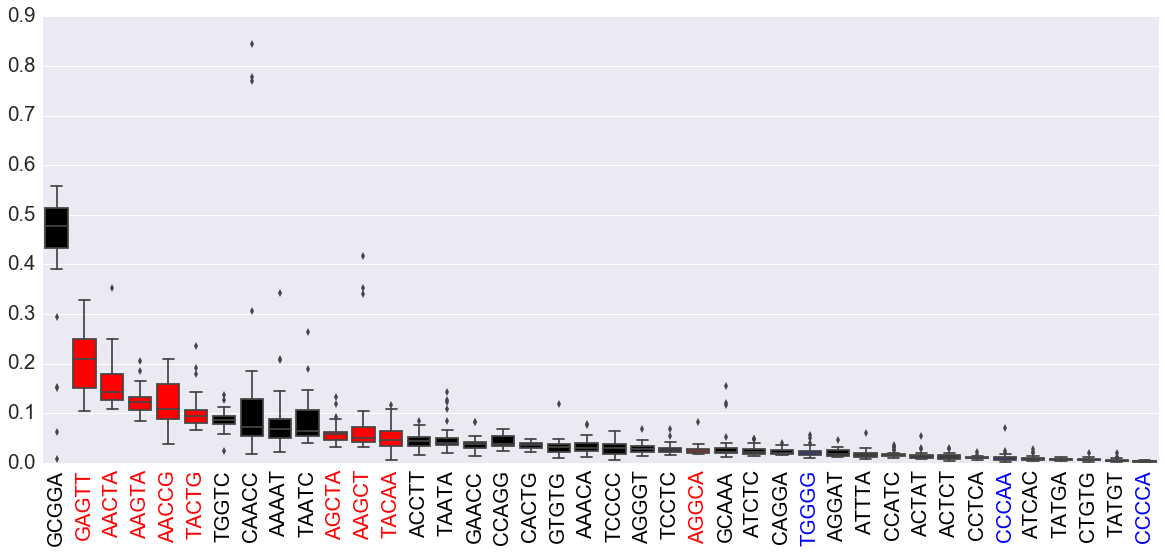

In [63]:
draw_diversity_graph(sample_reader.concatenate_kmer_freq_matrices(chain_type='IGL'),
                     coverage_threshold=5, mean_function=pd.DataFrame.median, threshold_function=pd.Panel.min,
                     diversity_function=calculate_mutability,
                     font_scale=2.05,
                     every_kth_kmer=10)
                     #output_pdf='/Users/andrewbzikadze/Yandex.Disk.localized/Documents/lab/lab_publications/immunogenomics/antevolo/figures/shm_model/mutability_diversity.pdf')

# Spots in Yale model

In [15]:
import pandas as pd

In [16]:
yale_mutability = pd.read_csv('yale_model/Mutability.csv', sep=' ')
yale_mutability.sort_values('Fivemer', inplace=True, ascending=True)
yale_mutability = yale_mutability.set_index(np.arange(yale_mutability.shape[0]))
measured_ind = np.where(yale_mutability['Source'] == 'Inferred')[0]
yale_mutability = yale_mutability.ix[measured_ind, :]
yale_mutability = yale_mutability.ix[np.arange(0, yale_mutability.shape[0], 2), :]
yale_mutability.sort_values('Mutability', inplace=True, ascending=False)
#yale_mutability

In [17]:
fivemer_indexes = yale_mutability.index

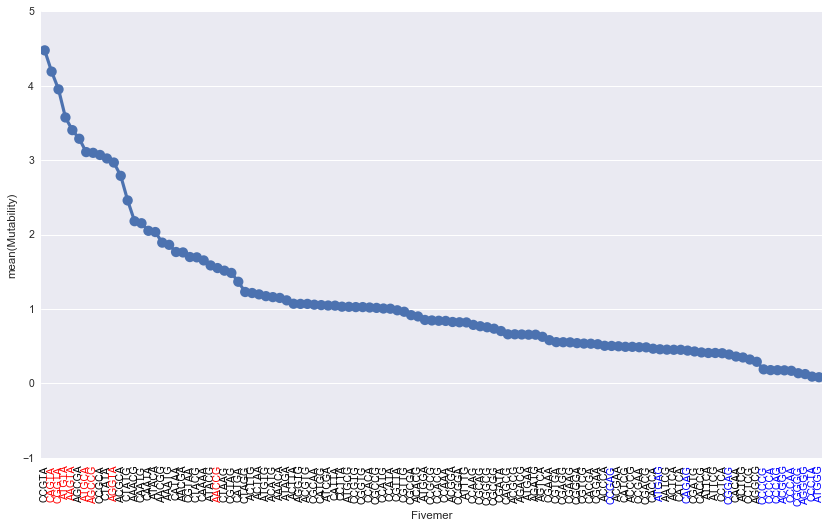

In [18]:
plt.rcParams['figure.figsize'] = 14, 8 # that's default image size for this interactive session
colors=get_spot_colors("red", "blue")
g = sns.pointplot(x="Fivemer", y="Mutability", data=yale_mutability)
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)
_ = [t.set_color(i) for (i,t) in zip(colors[fivemer_indexes], g.xaxis.get_ticklabels())]
#[t.set_facecolor(i) for (i,t) in zip(colors[yale_mutability["Fivemer"].index]), g.artists]